In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib         


In [167]:
df= pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
df=df.drop(columns=['Name','Ticket','Cabin'])
print(df[df['Fare']>500])
print(df.isnull().sum())

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch      Fare  \
258          259         1       1  female  35.0      0      0  512.3292   
679          680         1       1    male  36.0      0      1  512.3292   
737          738         1       1    male  35.0      0      0  512.3292   

    Embarked  
258        C  
679        C  
737        C  
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [172]:
imputer = SimpleImputer(strategy='mean')
df[['Age']]=imputer.fit_transform(df[['Age']]).astype(int)

imputer = SimpleImputer(strategy='most_frequent')
df[['Embarked']]=imputer.fit_transform(df[['Embarked']])

print(np.dtype(df['Age']))
df.isnull().sum()

int64


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 62.8+ KB


In [173]:
df['Sex']=df['Sex'].astype(str)
df['Embarked']=df['Embarked'].astype(str)
df=df.convert_dtypes()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    Int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       891 non-null    Int64  
 3   Sex          891 non-null    string 
 4   Age          891 non-null    Int64  
 5   SibSp        891 non-null    Int64  
 6   Parch        891 non-null    Int64  
 7   Fare         891 non-null    Float64
 8   Embarked     891 non-null    string 
dtypes: Float64(1), Int64(6), string(2)
memory usage: 68.9 KB
None


In [174]:
df=df.rename(columns={'SibSp':'Siblings','Parch':'Parents'})
print(df)

     PassengerId  Survived  Pclass     Sex  Age  Siblings  Parents     Fare  \
0              1         0       3    male   22         1        0     7.25   
1              2         1       1  female   38         1        0  71.2833   
2              3         1       3  female   26         0        0    7.925   
3              4         1       1  female   35         1        0     53.1   
4              5         0       3    male   35         0        0     8.05   
..           ...       ...     ...     ...  ...       ...      ...      ...   
886          887         0       2    male   27         0        0     13.0   
887          888         1       1  female   19         0        0     30.0   
888          889         0       3  female   29         1        2    23.45   
889          890         1       1    male   26         0        0     30.0   
890          891         0       3    male   32         0        0     7.75   

    Embarked  
0          S  
1          C  
2     

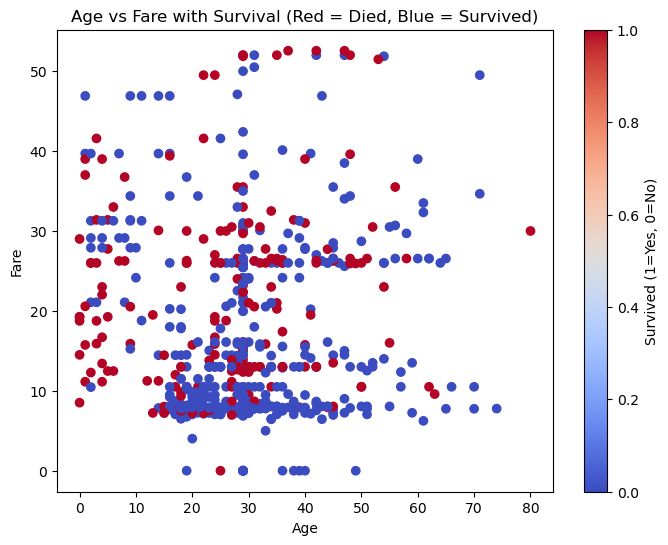

     PassengerId  Survived  Pclass     Sex  Age  Siblings  Parents     Fare  \
0              1         0       3    male   22         1        0     7.25   
2              3         1       3  female   26         0        0    7.925   
4              5         0       3    male   35         0        0     8.05   
5              6         0       3    male   29         0        0   8.4583   
6              7         0       1    male   54         0        0  51.8625   
..           ...       ...     ...     ...  ...       ...      ...      ...   
886          887         0       2    male   27         0        0     13.0   
887          888         1       1  female   19         0        0     30.0   
888          889         0       3  female   29         1        2    23.45   
889          890         1       1    male   26         0        0     30.0   
890          891         0       3    male   32         0        0     7.75   

    Embarked  
0          S  
2          S  
4     

In [152]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df = df[(df['Fare'] >= lower) & (df['Fare'] <= upper)]


plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='coolwarm')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare with Survival (Red = Died, Blue = Survived)")
plt.colorbar(label="Survived (1=Yes, 0=No)")
plt.show()
df.shape
print(df)


In [178]:
x=df[['Pclass','Sex','Age','Siblings','Parents','Fare','Embarked']]
y=df['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

preprocess = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),['Age','Siblings','Parents','Fare']),
        ('cat',OneHotEncoder(),['Pclass','Sex','Embarked'])
    ]
)
pipe =Pipeline([
    ('step',preprocess),
    ('pca',PCA(n_components=0.95)),
    ('model',KNeighborsClassifier(n_neighbors=27))
])



pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('Accuracy : ',np.round(accuracy_score(y_test,y_pred)*100,2),'%')



pclass=int(input('Enter Class Type (1 2 3) : '))
sex=input('Enter Gender (male female) : ')
age=int(input('Enter Age : '))
siblings=int(input('Enter siblings : '))
parents=int(input('Enter Parents : '))
fare=int(input('Enter Ticket Price (10$ to 60$ usually) : '))
embarked=input('Enter Your HomeTown (S : Southemphetom England , C : Cherburg France , Q : Queenstown Irland) : ')

inputdata=pd.DataFrame([[pclass,sex,age,siblings,parents,fare,embarked]],columns=['Pclass','Sex','Age','Siblings','Parents','Fare','Embarked'])
result=pipe.predict(inputdata)[0]
if result==1:
    print('You will Likeyly to Survived')
else:
    print('You will Likeyly to Dead')




Accuracy :  80.45 %


Enter Class Type (1 2 3) :  2
Enter Gender (male female) :  male
Enter Age :  20
Enter siblings :  2
Enter Parents :  2
Enter Ticket Price (10$ to 60$ usually) :  35
Enter Your HomeTown (S : Southemphetom England , C : Cherburg France , Q : Queenstown Irland) :  C


You will Likeyly to Survived


In [180]:
joblib.dump(pipe,'TitanicPipeline.pkl')

['TitanicPipeline.pkl']

In [181]:
titanicpipe=joblib.load('TitanicPipeline.pkl')


pclass=int(input('Enter Class Type (1 2 3) : '))
sex=input('Enter Gender (male female) : ')
age=int(input('Enter Age : '))
siblings=int(input('Enter siblings : '))
parents=int(input('Enter Parents : '))
fare=int(input('Enter Ticket Price (10$ to 60$ usually) : '))
embarked=input('Enter Your HomeTown (S : Southemphetom England , C : Cherburg France , Q : Queenstown Irland) : ')

inputdata=pd.DataFrame([[pclass,sex,age,siblings,parents,fare,embarked]],columns=['Pclass','Sex','Age','Siblings','Parents','Fare','Embarked'])
result=titanicpipe.predict(inputdata)[0]
if result==1:
    print('You will Likeyly to Survived')
else:
    print('You will Likeyly to Dead')




Enter Class Type (1 2 3) :  2
Enter Gender (male female) :  male
Enter Age :  20
Enter siblings :  2
Enter Parents :  2
Enter Ticket Price (10$ to 60$ usually) :  35
Enter Your HomeTown (S : Southemphetom England , C : Cherburg France , Q : Queenstown Irland) :  Q


You will Likeyly to Dead
